In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
# Load dataset
file_path = "JFK-Flights.csv"
df = pd.read_csv(file_path)

In [3]:
### 1. General Dataset Overview ###
print("Dataset Info:")
print(df.info())
print("\nMissing Values:\n", df.isnull().sum())

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28820 entries, 0 to 28819
Data columns (total 23 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   MONTH              28820 non-null  int64  
 1   DAY_OF_MONTH       28820 non-null  int64  
 2   DAY_OF_WEEK        28820 non-null  int64  
 3   OP_UNIQUE_CARRIER  28820 non-null  object 
 4   TAIL_NUM           28820 non-null  object 
 5   DEST               28820 non-null  object 
 6   DEP_DELAY          28820 non-null  int64  
 7   CRS_ELAPSED_TIME   28820 non-null  int64  
 8   DISTANCE           28820 non-null  int64  
 9   CRS_DEP_M          28820 non-null  int64  
 10  DEP_TIME_M         28820 non-null  int64  
 11  CRS_ARR_M          28820 non-null  int64  
 12  Temperature        28820 non-null  int64  
 13  Dew Point          28820 non-null  object 
 14  Humidity           28820 non-null  int64  
 15  Wind               28818 non-null  object 
 16  Wind Spe

In [4]:
# Summary statistics
print("\nSummary Statistics:\n", df.describe())


Summary Statistics:
               MONTH  DAY_OF_MONTH   DAY_OF_WEEK     DEP_DELAY  \
count  28820.000000  28820.000000  28820.000000  28820.000000   
mean       7.894240     16.021096      4.008952      6.374983   
std        4.991723      8.750179      1.985230     38.735144   
min        1.000000      1.000000      1.000000    -22.000000   
25%        1.000000      8.000000      2.000000     -6.000000   
50%       11.000000     16.000000      4.000000     -3.000000   
75%       12.000000     24.000000      6.000000      2.000000   
max       12.000000     31.000000      7.000000   1276.000000   

       CRS_ELAPSED_TIME      DISTANCE     CRS_DEP_M    DEP_TIME_M  \
count      28820.000000  28820.000000  28820.000000  28820.000000   
mean         225.288203   1267.746079    831.003851    828.934698   
std          119.482417    889.343246    299.398525    305.864103   
min           57.000000     94.000000    301.000000      1.000000   
25%          124.000000    483.000000    545.00

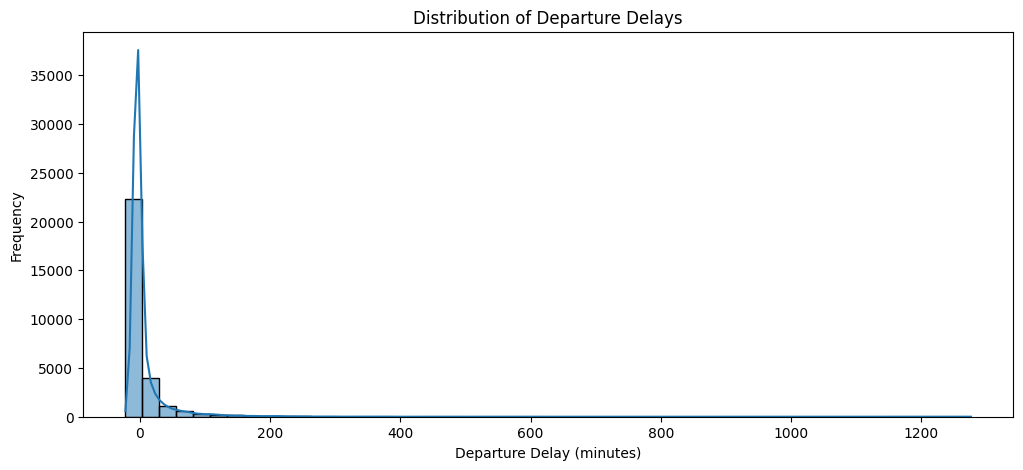

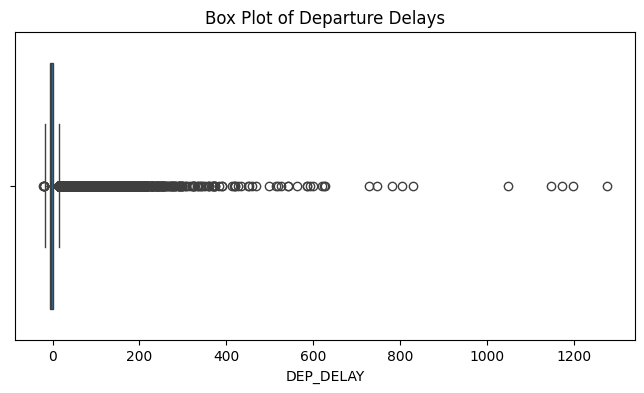

In [5]:
### 2. Distribution of Target Variable (DEP_DELAY) ###
plt.figure(figsize=(12,5))
sns.histplot(df['DEP_DELAY'], bins=50, kde=True)
plt.title('Distribution of Departure Delays')
plt.xlabel('Departure Delay (minutes)')
plt.ylabel('Frequency')
plt.show()

# Box plot to identify outliers
plt.figure(figsize=(8,4))
sns.boxplot(x=df['DEP_DELAY'])
plt.title('Box Plot of Departure Delays')
plt.show()

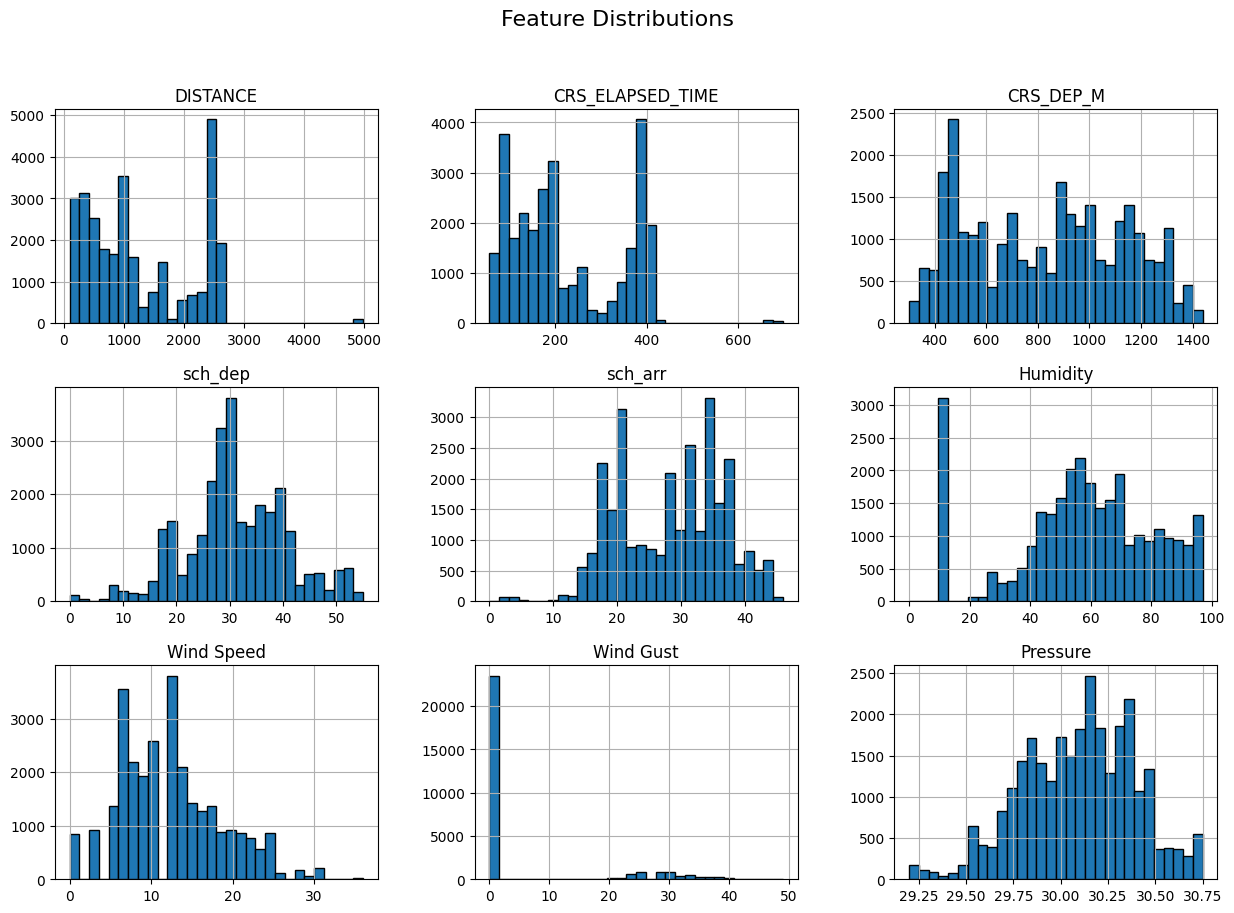

In [40]:
### 3. Feature Distributions ###
num_features = ['DISTANCE', 'CRS_ELAPSED_TIME', 'CRS_DEP_M', 'sch_dep', 'sch_arr',
                'Dew Point', 'Humidity', 'Wind Speed', 'Wind Gust', 'Pressure']

df[num_features].hist(figsize=(15, 10), bins=30, edgecolor='black')
plt.suptitle("Feature Distributions", fontsize=16)
plt.show()

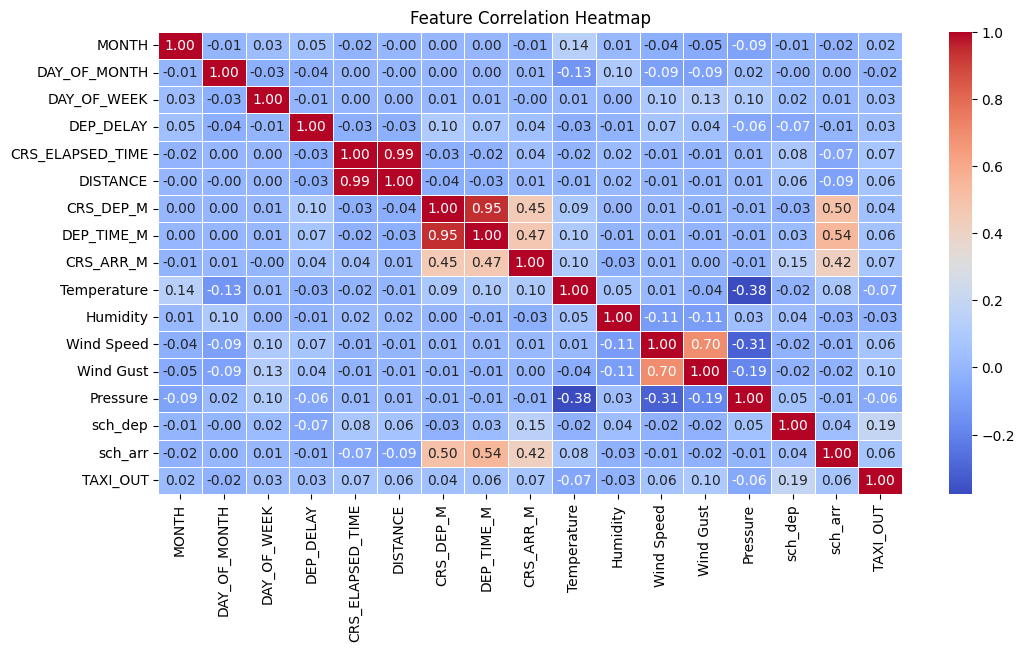

In [7]:
### 4. Correlation Matrix ###
numeric_df = df.select_dtypes(include=['number'])
plt.figure(figsize=(12, 6))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Feature Correlation Heatmap")
plt.show()

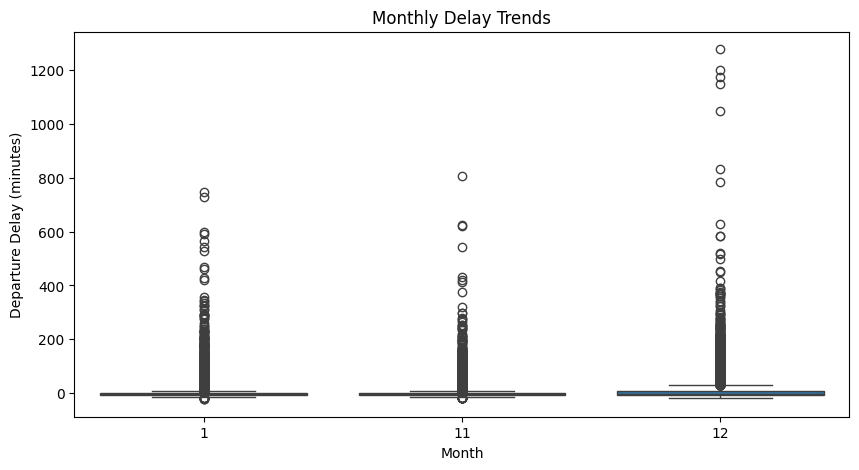

In [8]:
### 5. Monthly Delay Trends ###
plt.figure(figsize=(10,5))
sns.boxplot(x='MONTH', y='DEP_DELAY', data=df)
plt.title('Monthly Delay Trends')
plt.xlabel('Month')
plt.ylabel('Departure Delay (minutes)')
plt.show()

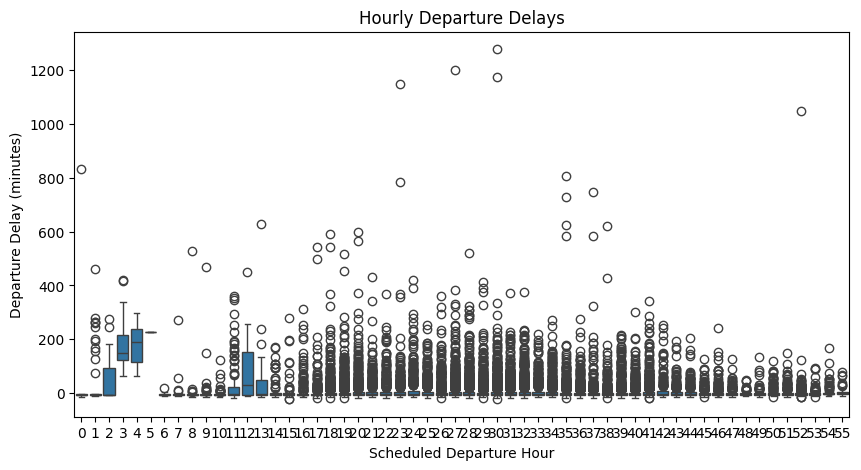

In [9]:
### 6. Hourly Delay Trends ###
plt.figure(figsize=(10,5))
sns.boxplot(x='sch_dep', y='DEP_DELAY', data=df)
plt.title('Hourly Departure Delays')
plt.xlabel('Scheduled Departure Hour')
plt.ylabel('Departure Delay (minutes)')
plt.show()

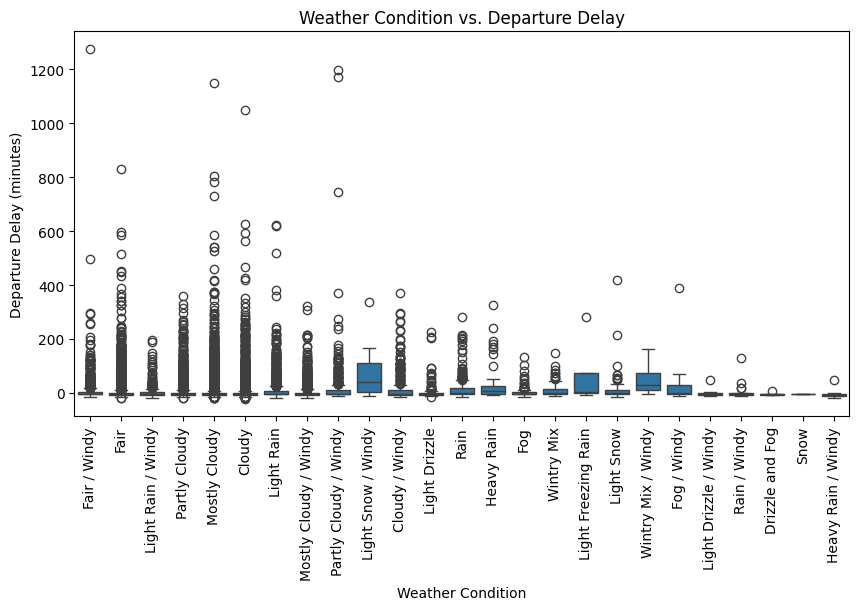

In [10]:
### 7. Weather Impact on Delays ###
plt.figure(figsize=(10,5))
sns.boxplot(x='Condition', y='DEP_DELAY', data=df)
plt.xticks(rotation=90)
plt.title('Weather Condition vs. Departure Delay')
plt.xlabel('Weather Condition')
plt.ylabel('Departure Delay (minutes)')
plt.show()

In [32]:
jfk_df = pd.read_csv("JFK-Flights.csv")
jfk_df = jfk_df.dropna(subset=["DEP_DELAY", "sch_dep"])
jfk_df["Hour"] = (jfk_df["sch_dep"] // 60).astype(int)
avg_delay_per_hour = jfk_df.groupby("Hour")["DEP_DELAY"].mean().reset_index()


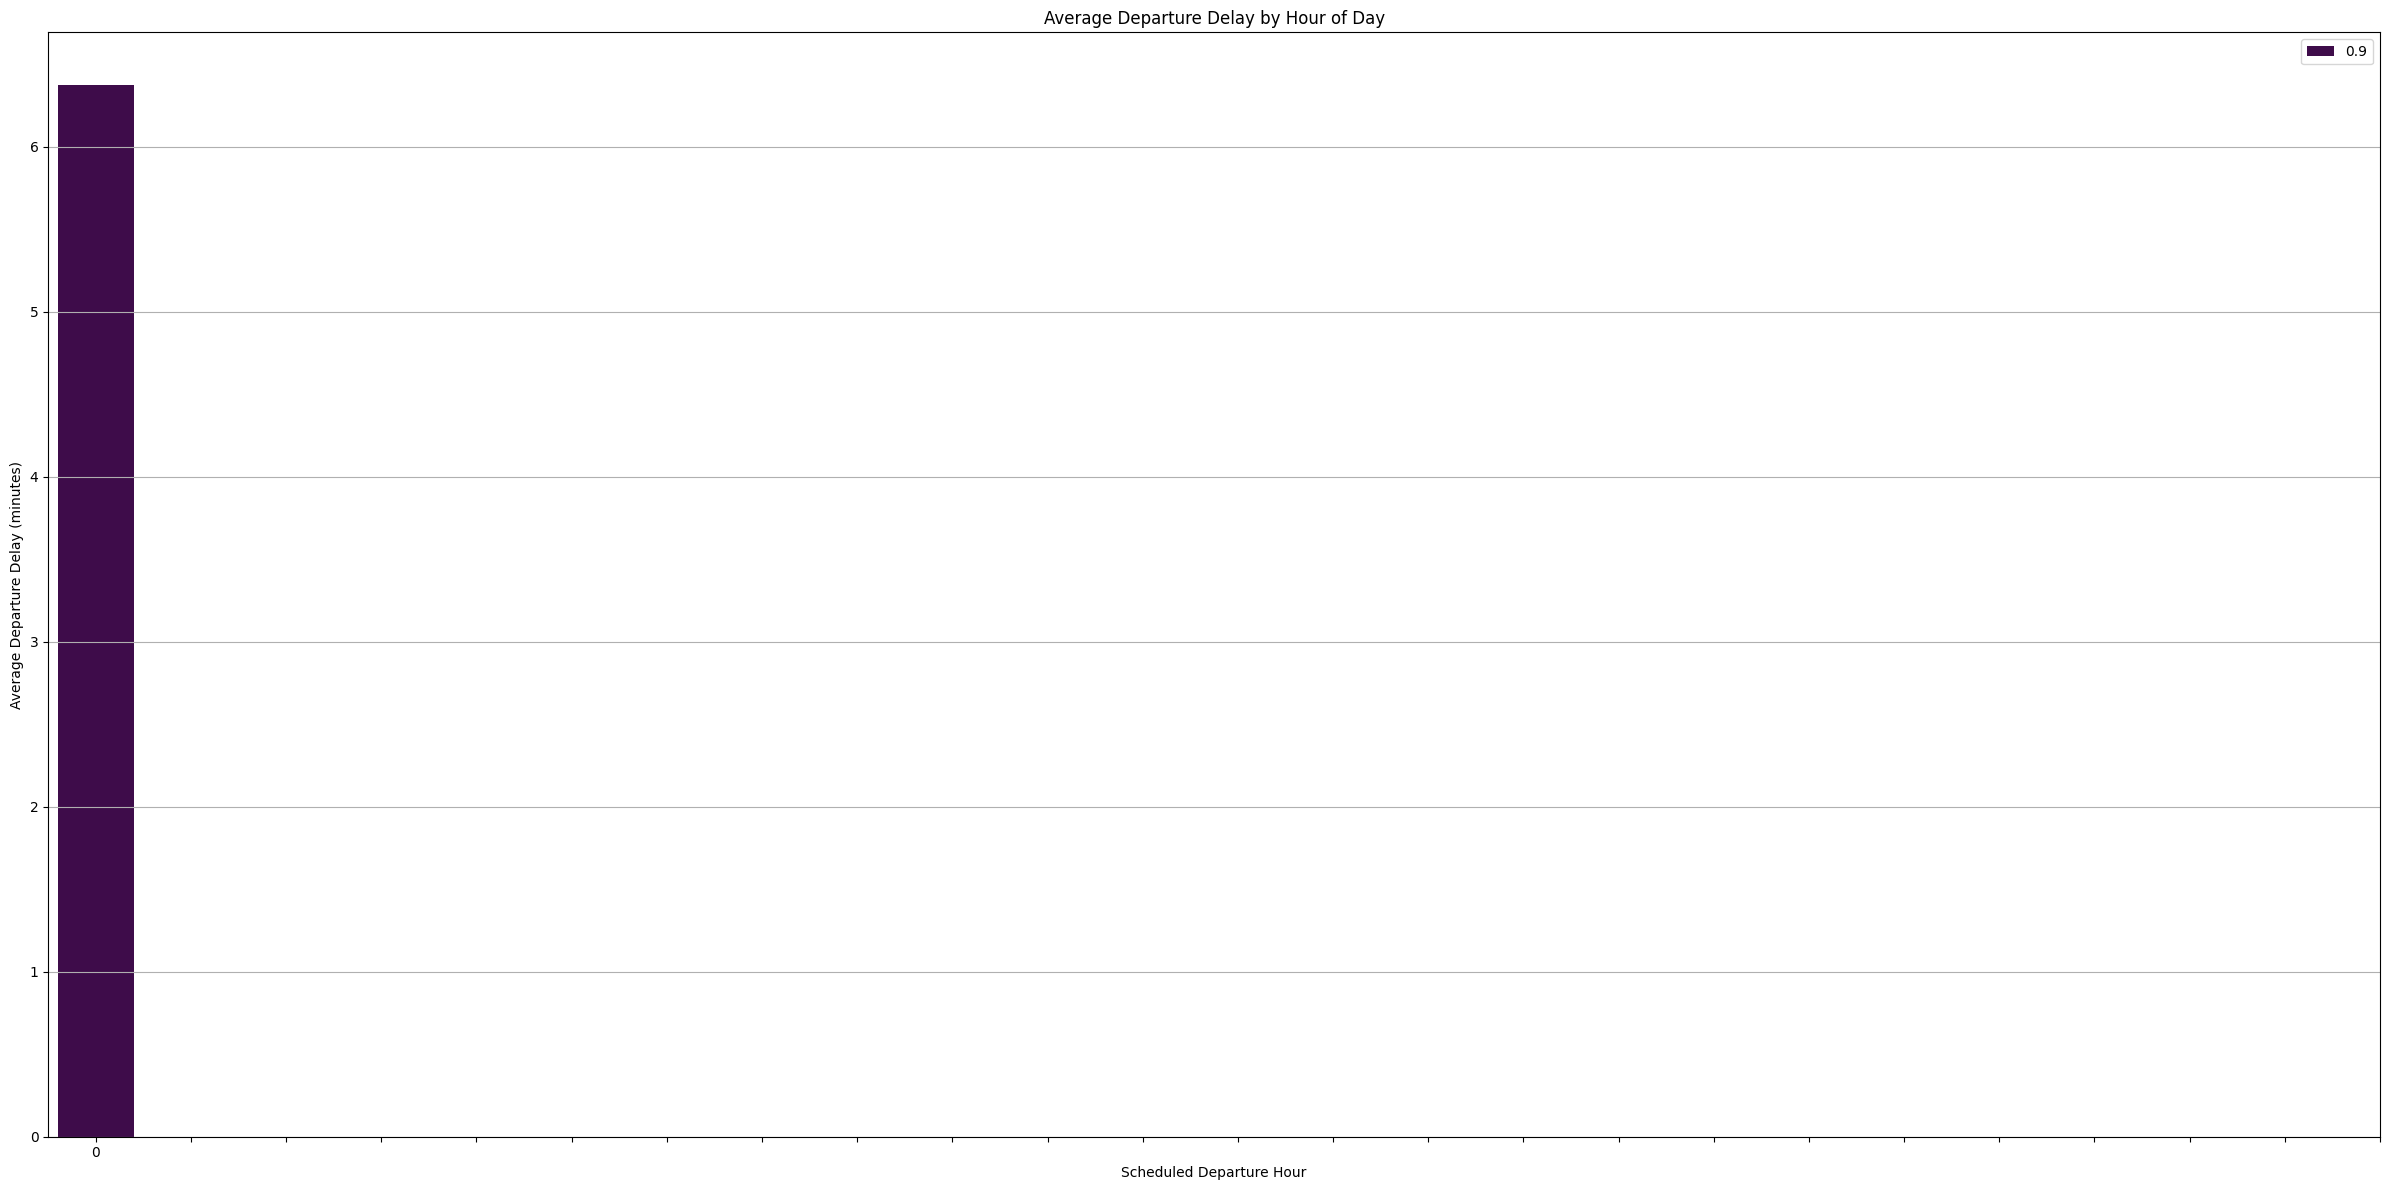

In [37]:
plt.figure(figsize=(24, 12))
sns.barplot(x="Hour", y="DEP_DELAY", data=avg_delay_per_hour, palette="viridis", hue=0.9)
plt.title("Average Departure Delay by Hour of Day")
plt.xlabel("Scheduled Departure Hour")
plt.ylabel("Average Departure Delay (minutes)")
plt.grid(True, axis='y')
plt.xticks(ticks=np.arange(0, 25, 1))
plt.tight_layout()
plt.show()
